# General exploration of sample and detector

For further reading, see "Design and construction of the MicroBooNE detector" (R. Acciarri et al 2017 JINST 12 P02017, https://arxiv.org/abs/1612.05824)

## Load useful libraries, utilities, and data

In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
from detector_utils import *
from file_utils import *

We now load a data file:

In [3]:
f = h5py.File("NeutrinoML_Open_NoWire_bnb-test.h5", "r")
#f = h5py.File("NeutrinoML_Open_NoWire_nue-test.h5", "r")

In [41]:
print("\nprinting top-level keys (data tables):")
print(f.keys())


printing top-level keys (data tables):
<KeysViewHDF5 ['edep_table', 'event_table', 'hit_table', 'opflash_table', 'ophit_table', 'pandoraHit_table', 'pandoraPfp_table', 'pandoraPrimary_table', 'particle_table']>


## Detector wires

The following scans the wires in each plane, and plots the detector positions of wires in intervals of 200 wires.

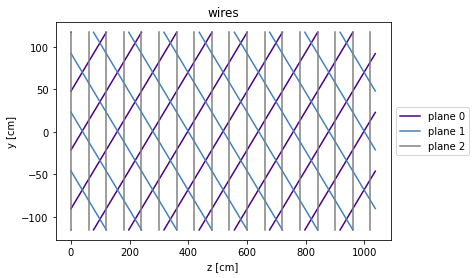

In [4]:
for p in range(0,nplanes()):
    color = 'grey'
    if p==0: color = 'indigo'
    if p==1: color = 'steelblue'
    for w in range(0,nwires(p),200):
        start = wireStartPos(p,w)
        end = wireEndPos(p,w)
        x = [start[2],end[2]]
        y = [start[1],end[1]]
        plt.plot(x, y, label = "plane %i"%p, linestyle="-",color=color)
plt.xlabel('z [cm]')
plt.ylabel('y [cm]')
plt.title('wires')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

The following shows some utilities to check if two wires cross and compute their intersection point in the YZ plane.

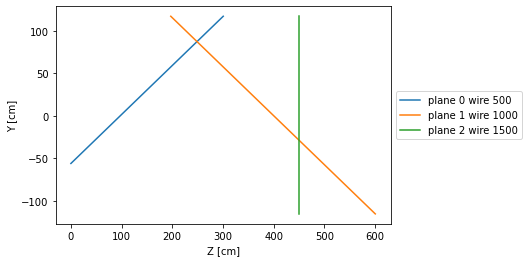

do plane 0 wire 500 and plane 1 wire 1000 cross? True
crossing: [87.57235399441043, 248.80003865905684]
do plane 1 wire 1000 and plane 2 wire 1500 cross? True
crossing: [-28.734615075765433, 450.25]
do plane 0 wire 500 and plane 2 wire 1500 cross? False


In [5]:
w0 = 500
w1 = 1000
w2 = 1500

start = wireStartPos(0,w0)
end = wireEndPos(0,w0)
x = [start[2],end[2]]
y = [start[1],end[1]]
plt.plot(x, y, label = "plane 0 wire %i"%w0, linestyle="-")

start = wireStartPos(1,w1)
end = wireEndPos(1,w1)
x = [start[2],end[2]]
y = [start[1],end[1]]
plt.plot(x, y, label = "plane 1 wire %i"%w1, linestyle="-")

start = wireStartPos(2,w2)
end = wireEndPos(2,w2)
x = [start[2],end[2]]
y = [start[1],end[1]]
plt.plot(x, y, label = "plane 2 wire %i"%w2, linestyle="-")

plt.xlabel('Z [cm]')
plt.ylabel('Y [cm]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

print('do plane 0 wire %i and plane 1 wire %i cross?'%(w0,w1),doWiresCross(0,w0,1,w1))
if (doWiresCross(0,w0,1,w1)): print('crossing:',wireCrossingYZ(0,w0,1,w1))
print('do plane 1 wire %i and plane 2 wire %i cross?'%(w1,w2),doWiresCross(1,w1,2,w2))
if (doWiresCross(1,w1,2,w2)): print('crossing:',wireCrossingYZ(1,w1,2,w2))
print('do plane 0 wire %i and plane 2 wire %i cross?'%(w0,w2),doWiresCross(0,w0,2,w2))
if (doWiresCross(0,w0,2,w2)): print('crossing:',wireCrossingYZ(0,w0,2,w2))


We now check the hit multiplicity in each wire, to find out which wires are not functional.

In [6]:
hits = Table2DataFrame(f["hit_table"])
hits.columns

Index(['run', 'sub', 'evt', 'hit_id', 'integral', 'local_plane', 'local_time',
       'local_wire', 'rms', 'tpc'],
      dtype='object')

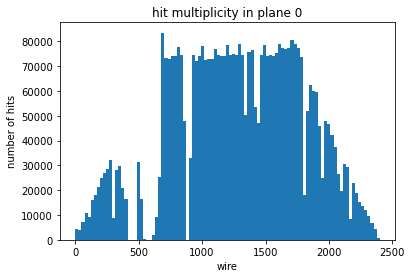

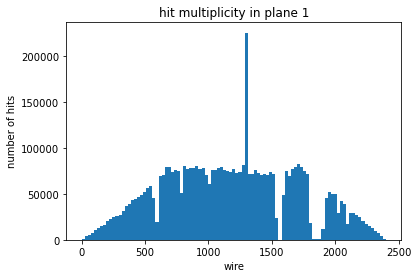

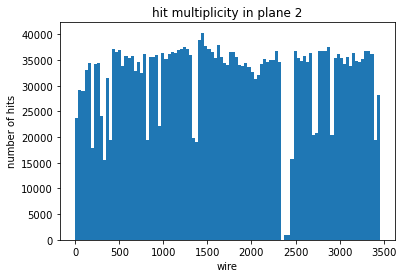

In [7]:
for p in range(0,nplanes()):
    plt.hist(hits[hits["local_plane"]==p]["local_wire"],bins=(np.linspace(0,nwires(p),100)))
    plt.title("hit multiplicity in plane %i"%p)
    plt.xlabel("wire")
    plt.ylabel("number of hits")
    plt.show()

## Simulated sample properties

The following plots the simulated neutrino interaction vertex position. For the inclusive BNB sample, this can take place anywhere in the cryostat, while for the nue samples interaction are restricted to the active detector volume.

In [8]:
events = Table2DataFrame(f["event_table"])
events.columns

Index(['run', 'sub', 'evt', 'nu_dir_0', 'nu_dir_1', 'nu_dir_2', 'nu_vtx_0',
       'nu_vtx_1', 'nu_vtx_2', 'nu_vtx_corr_0', 'nu_vtx_corr_1',
       'nu_vtx_corr_2', 'nu_vtx_wire_pos_0', 'nu_vtx_wire_pos_1',
       'nu_vtx_wire_pos_2', 'is_cc', 'lep_energy', 'nu_energy', 'nu_type',
       'nu_vtx_wire_time'],
      dtype='object')

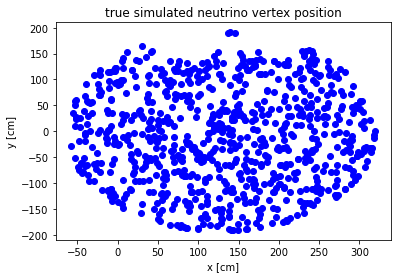

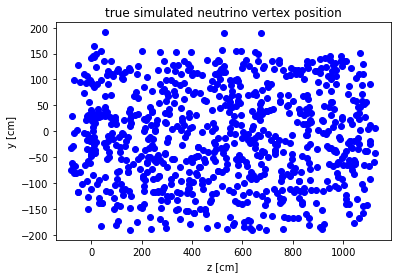

In [9]:
plt.plot(events['nu_vtx_0'],events['nu_vtx_1'],'bo')
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.title('true simulated neutrino vertex position')
plt.show()

plt.plot(events['nu_vtx_2'],events['nu_vtx_1'],'bo')
plt.xlabel('z [cm]')
plt.ylabel('y [cm]')
plt.title('true simulated neutrino vertex position')
plt.show()

For one event, we now we explore in detail the different ways the neutrino interaction vertex information is stored.

In [36]:
evt_idx = 5

print('true neutrino interaction pos x=',events['nu_vtx_0'][evt_idx],' y=',events['nu_vtx_1'][evt_idx],' z=',events['nu_vtx_2'][evt_idx],' [cm]')
print('after corrections for space charge distorsions x=',events['nu_vtx_corr_0'][evt_idx],' y=',events['nu_vtx_corr_1'][evt_idx],' z=',events['nu_vtx_corr_2'][evt_idx],' [cm]')
print('in terms of nearest wires on plane0=',events['nu_vtx_wire_pos_0'][evt_idx],' plane1=',events['nu_vtx_wire_pos_1'][evt_idx],' plane2=',events['nu_vtx_wire_pos_2'][evt_idx])

true neutrino interaction pos x= 97.37202  y= -41.483704  z= 290.67856  [cm]
after corrections for space charge distorsions x= 101.42939  y= -40.6824  z= 290.7281  [cm]
in terms of nearest wires on plane0= 940  plane1= 700  plane2= 968


As a test we can now check that we can reproduce within a wire spacing of 3 mm the corrected vertex position in the YZ plane when computing the wire intersections.

In [40]:
if isPosInActiveVolume(events['nu_vtx_0'][evt_idx],events['nu_vtx_1'][evt_idx],events['nu_vtx_2'][evt_idx]):
    print('YZ plane crossing (planes 0 and 1):',wireCrossingYZ(0,events['nu_vtx_wire_pos_0'][evt_idx],1,events['nu_vtx_wire_pos_1'][evt_idx]),' [cm]')
    print('YZ plane crossing (planes 0 and 2):',wireCrossingYZ(0,events['nu_vtx_wire_pos_0'][evt_idx],2,events['nu_vtx_wire_pos_2'][evt_idx]),' [cm]')
    print('YZ plane crossing (planes 1 and 2):',wireCrossingYZ(1,events['nu_vtx_wire_pos_1'][evt_idx],2,events['nu_vtx_wire_pos_2'][evt_idx]),' [cm]')
else:
    print('The neutirno vertex is not in the active volume, try with a different event.')

YZ plane crossing (planes 0 and 1): [-40.59914063080879, 290.79999999999995]  [cm]
YZ plane crossing (planes 0 and 2): [-40.68574300712304, 290.65]  [cm]
YZ plane crossing (planes 1 and 2): [-40.5125382544946, 290.65]  [cm]


The next plots explore the simulated neutrino interaction content of the samples. The nue sample is restricted to electron neutirno charged current interactions.

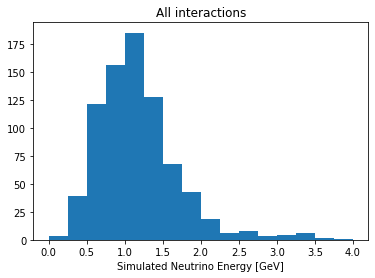

In [11]:
plt.hist(events['nu_energy'],bins=np.linspace(0,4,17))
plt.xlabel('Simulated Neutrino Energy [GeV]')
plt.title('All interactions')
plt.show()

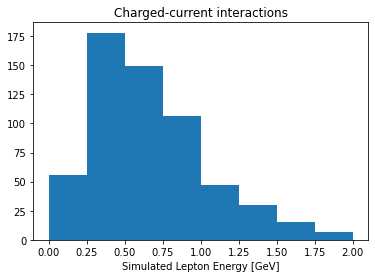

In [12]:
plt.hist(events.query('is_cc==1')['lep_energy'],bins=np.linspace(0,2,9))
plt.xlabel('Simulated Lepton Energy [GeV]')
plt.title('Charged-current interactions')
plt.show()

More detailed information of the simulated particles can be extracted from the particle table

In [13]:
parts = Table2DataFrame(f["particle_table"])
parts.columns

Index(['end_position_0', 'end_position_1', 'end_position_2',
       'end_position_corr_0', 'end_position_corr_1', 'end_position_corr_2',
       'end_wire_pos_0', 'end_wire_pos_1', 'end_wire_pos_2', 'run', 'sub',
       'evt', 'start_position_0', 'start_position_1', 'start_position_2',
       'start_position_corr_0', 'start_position_corr_1',
       'start_position_corr_2', 'start_wire_pos_0', 'start_wire_pos_1',
       'start_wire_pos_2', 'end_process', 'end_wire_time', 'g4_id', 'momentum',
       'parent_id', 'start_process', 'start_wire_time', 'type'],
      dtype='object')

In [14]:
primaries = parts[parts['start_process']==b'primary']

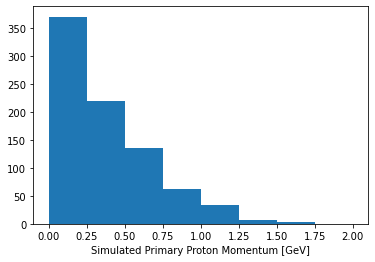

In [16]:
plt.hist(primaries.query('type==2212')['momentum'],bins=np.linspace(0,2,9))
plt.xlabel('Simulated Primary Proton Momentum [GeV]')
plt.show()

We can compute the proton multiplicity by counting the number of protons in each event as follows

In [17]:
nprotons_p03 = primaries[(primaries['type']==2212)&(primaries['momentum']>0.3)].groupby(["run","sub","evt"]).size().reset_index().rename(columns={0:'nprotons_p03'})
events = events.merge(nprotons_p03, on=["run","sub","evt"], how="left")
events.fillna(0, inplace=True)

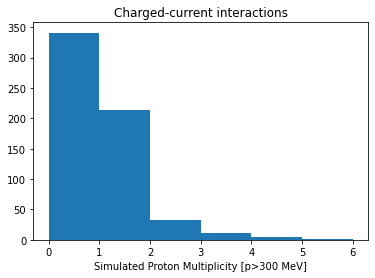

In [18]:
plt.hist(events.query('is_cc==1')['nprotons_p03'],bins=np.linspace(0,6,7))
plt.xlabel('Simulated Proton Multiplicity [p>300 MeV]')
plt.title('Charged-current interactions')
plt.show()